In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True
import re

import glob
im

In [2]:
glob.glob('*NaCl*')

['reologia_NaCl_NaSal.txt']

In [11]:
dado = pd.read_csv('reologia_NaCl_NaSal.txt', sep='\t', decimal=',')
dado['tr log'] = np.log10(dado['tr'])
dado

,CNaCl,tr,terr,trnasal,tr log
0,3000,1.06981,0.10665,12,0.029307
1,3500,4.69735,0.20354,12,0.671853
2,4000,9.65396,0.33078,12,0.984705
3,4500,23.48767,0.56006,12,1.370840
4,5000,42.72436,1.28601,12,1.630676


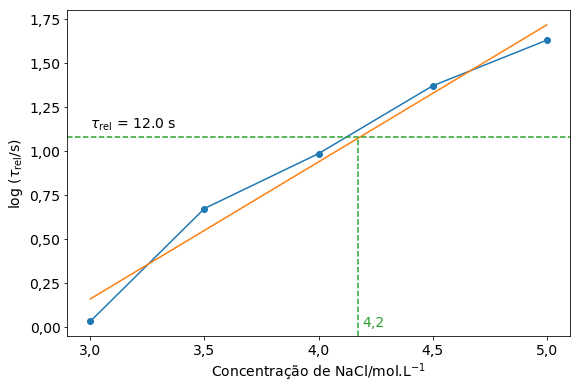

In [98]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

visc_nasal = 12

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(dado['CNaCl'], dado['tr log'], marker='o')

slp, inter = np.polyfit(dado['CNaCl'], dado['tr log'], 1)
fit = np.linspace(3000, 5000, 5) * slp + inter
ax.plot(dado['CNaCl'], fit)

ax.set_xticks(dado['CNaCl'])

xticklabels = []
for conc in dado['CNaCl']:
    xticklabels.append(f'{conc/1000:.1f}'.replace('.', ','))

ax.set_xticklabels(xticklabels)
ax.set(xlabel = 'Concentração de NaCl/mol.L$^{-1}$', ylabel=r'log ($\tau_\mathrm{rel}$/s)')

ax.axhline(y = np.log10(visc_nasal), linestyle='--', color='C2')
ax.text(y = np.log10(visc_nasal)+0.05, x = 3000, s = rf'$\tau_\mathrm{{rel}}$ = {visc_nasal:.1f} s')

#for i in np.linspace(3000, 5000, 100):
#    diffs[i] = i * slp + inter - np.log10(visc_nasal)

diffs = np.abs(np.linspace(3000, 5000, 100) * slp + inter - np.log10(visc_nasal))
cross_x = np.linspace(3000, 5000, 100)[diffs.argmin()]
cross_y = cross_x * slp + inter
ponto = (cross_x, cross_y)

axpos = ax.transData.transform(ponto)
axpos = ax.transAxes.inverted().transform(axpos)

ax.axvline(x = cross_x, ymax=axpos[1], linestyle='--', color='C2')
ax.text(x = cross_x + 20, y = 0, s = f'{cross_x/1000:.1f}'.replace('.', ','), color='C2')

fig.savefig(r'../../reologia/equivalencia_nasal_nacl.pdf')